## 개요

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (50.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 불러오기
plt.rc('font', family='NanumBarunGothic')

In [3]:
# 파일 불러오기
df = pd.read_csv('/content/ai4i2020.csv')

In [ ]:
# 데이터 확인
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


### 전처리

In [4]:
# UDI를 인덱스로
df.set_index('UDI',inplace=True)
# 확인
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [5]:
# 컬럼명 단위 삭제
df.rename(columns={'Air temperature [K]':'Air temperature',
                   'Process temperature [K]':'Process temperature',
                   'Rotational speed [rpm]':'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'},inplace=True)
# 확인
df

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [ ]:
# 데이터 정보 확인 / null값 존재 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  object 
 1   Type                 10000 non-null  object 
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Machine failure      10000 non-null  int64  
 8   TWF                  10000 non-null  int64  
 9   HDF                  10000 non-null  int64  
 10  PWF                  10000 non-null  int64  
 11  OSF                  10000 non-null  int64  
 12  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
# 대이터 개관 확인
df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
# 켈빈(K) 온도에서 섭씨(C) 온도로
df['Air temperature'] = df['Air temperature'] - 273.15
df['Process temperature'] = df['Process temperature'] - 273.15
# 확인
df

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0


In [7]:
# 한글화
df.rename(columns={'UDI':'고유 식별자',
                   'Product ID':'제품 ID',
                   'Type':'제품 유형',
                   'Air temperature':'기온',
                   'Process temperature':'공정 온도',
                   'Rotational speed':'회전 속도',
                   'Torque':'Torque',
                   'Tool wear':'공구 마모',
                   'Machine failure':'실패 여부',
                   'TWF':'실패 요인 : 공구 마모',
                   'HDF':'실패 요인 : 열 방산',
                   'PWF':'실패 요인 : 전력 이상',
                   'OSF':'실패 요인 : 제품 변형',
                   'RNF':'실패 요인 : 알 수 없음'},inplace=True)
# 확인
df

,제품 ID,제품 유형,기온,공정 온도,회전 속도,Torque,공구 마모,실패 여부,실패 요인 : 공구 마모,실패 요인 : 열 방산,실패 요인 : 전력 이상,실패 요인 : 제품 변형,실패 요인 : 알 수 없음
UDI,,,,,,,,,,,,,
1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0


# 서론

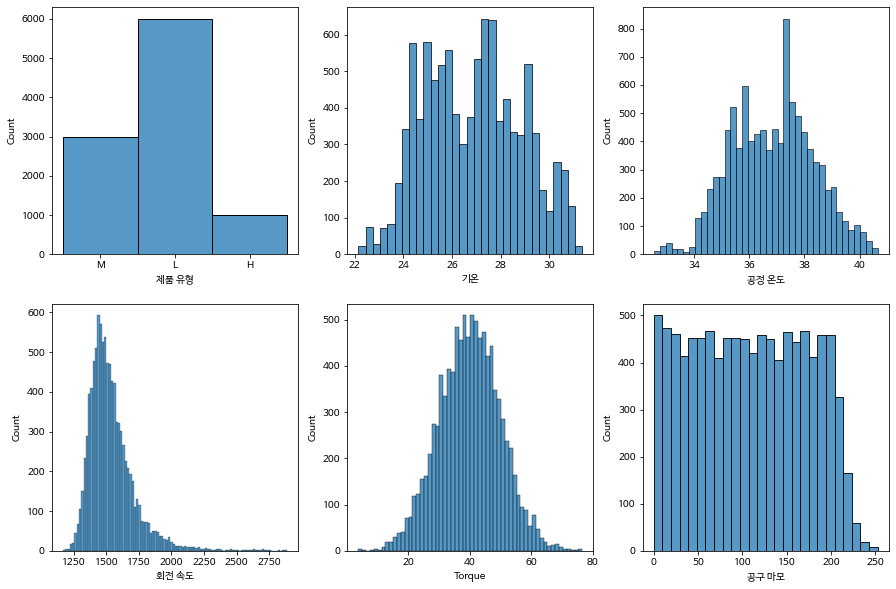

In [ ]:
# 변인 분포 시각화
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

sns.histplot(df['제품 유형'],ax=ax1)
sns.histplot(df['기온'],ax=ax2)
sns.histplot(df['공정 온도'],ax=ax3)
sns.histplot(df['회전 속도'],ax=ax4)
sns.histplot(df['Torque'],ax=ax5)
sns.histplot(df['공구 마모'],ax=ax6)

plt.show()

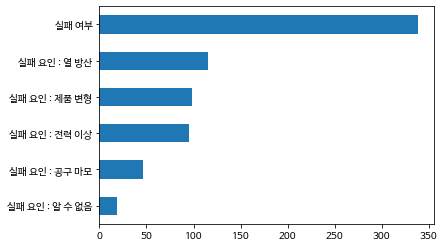

In [ ]:
# 실패 요인 갯수 합산
df[['실패 여부', '실패 요인 : 공구 마모', '실패 요인 : 열 방산', '실패 요인 : 전력 이상', '실패 요인 : 제품 변형', '실패 요인 : 알 수 없음']].sum().sort_values().plot(kind='barh')

# 본론

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


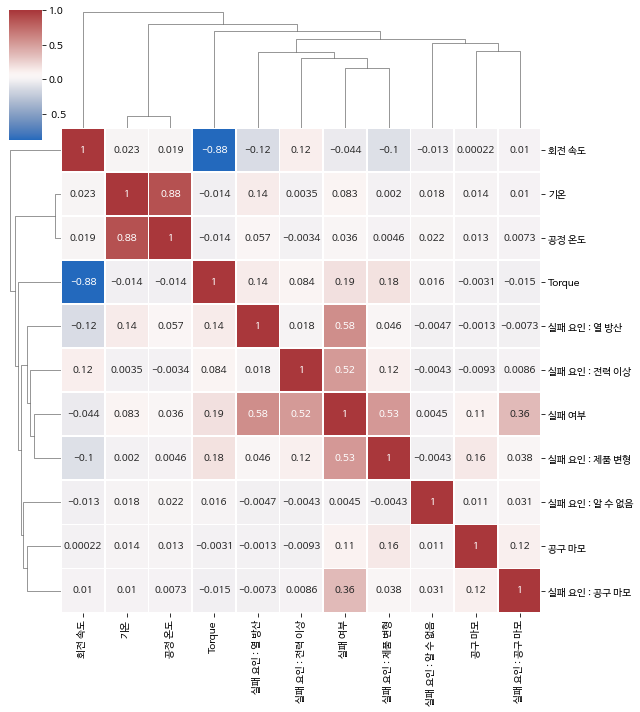

In [ ]:
# 상관계수 도출
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

## 각 변수들과 실패 여부와의 상관관계 분석

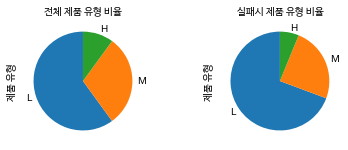

In [ ]:
# 실패 여부에 따른 제품 유형 비율 파이 차트
fig = plt.figure(figsize=(10,5))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)

df['제품 유형'].value_counts().plot(kind='pie', startangle=90, ax=ax1)
df[df['실패 여부']==1]['제품 유형'].value_counts().plot(kind='pie', startangle=90, ax=ax2)

ax1.set_title('전체 제품 유형 비율', size=10)
ax2.set_title('실패시 제품 유형 비율', size=10)

plt.show()

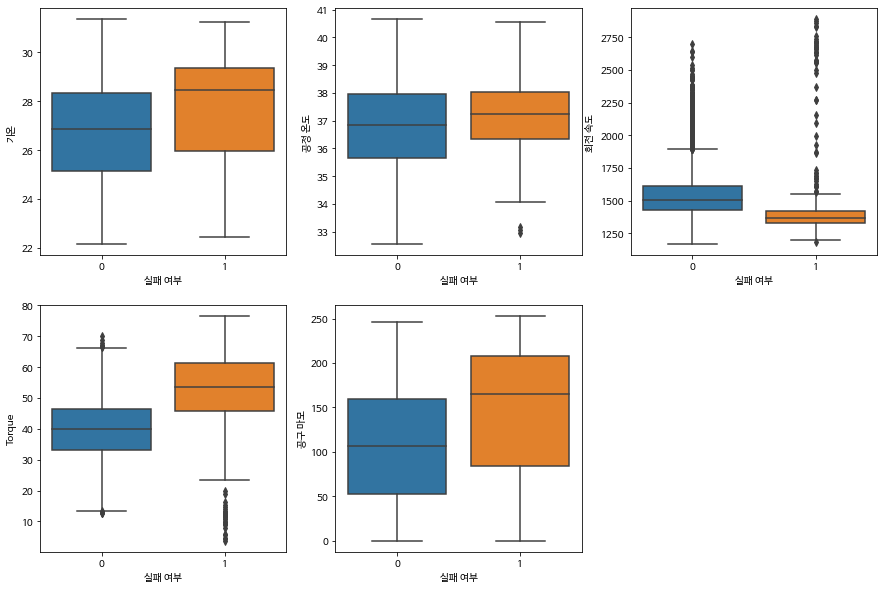

In [ ]:
# 실패 여부와 여러 변수들 박스플롯
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='실패 여부', y='기온', data=df, ax=ax1)
sns.boxplot(x='실패 여부', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='실패 여부', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='실패 여부', y='Torque', data=df, ax=ax4)
sns.boxplot(x='실패 여부', y='공구 마모', data=df, ax=ax5)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


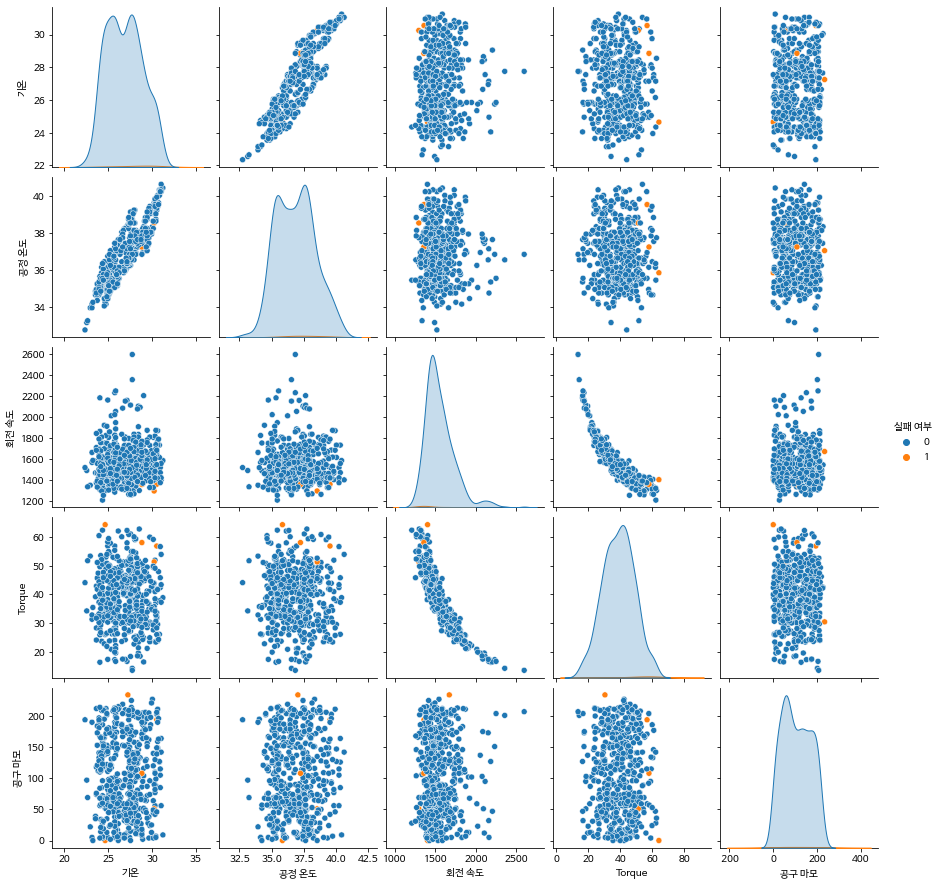

In [ ]:
sns.pairplot(df[['기온', '공정 온도', '회전 속도', 'Torque', '공구 마모', '실패 여부']].sample(frac=0.05), hue='실패 여부')

## 변수들과 각 실패요인 간의 상관관계 분석

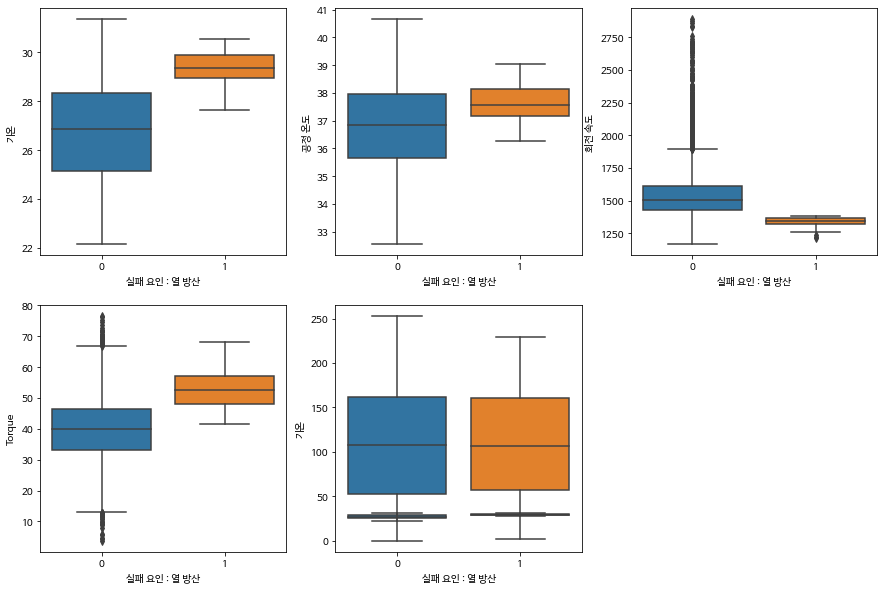

In [ ]:
# 각 변수들과 '실패 요인 : 열 방산'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='실패 요인 : 열 방산', y='기온', data=df, ax=ax1)
sns.boxplot(x='실패 요인 : 열 방산', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='실패 요인 : 열 방산', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='실패 요인 : 열 방산', y='Torque', data=df, ax=ax4)
sns.boxplot(x='실패 요인 : 열 방산', y='공구 마모', data=df, ax=ax5)

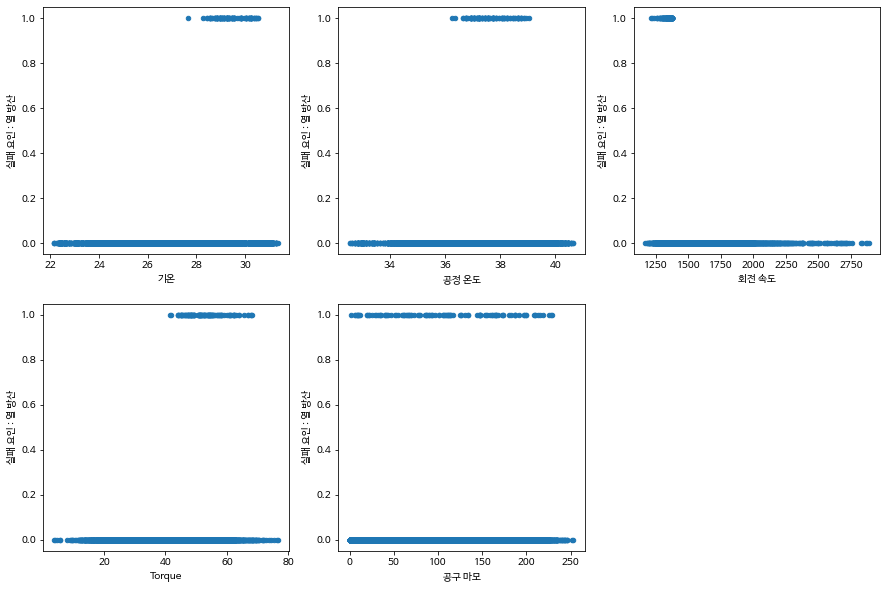

In [8]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='실패 요인 : 열 방산', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='실패 요인 : 열 방산', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='실패 요인 : 열 방산', kind='scatter', ax=ax3)
df.plot(x='Torque', y='실패 요인 : 열 방산', kind='scatter', ax=ax4)
df.plot(x='공구 마모', y='실패 요인 : 열 방산', kind='scatter', ax=ax5)

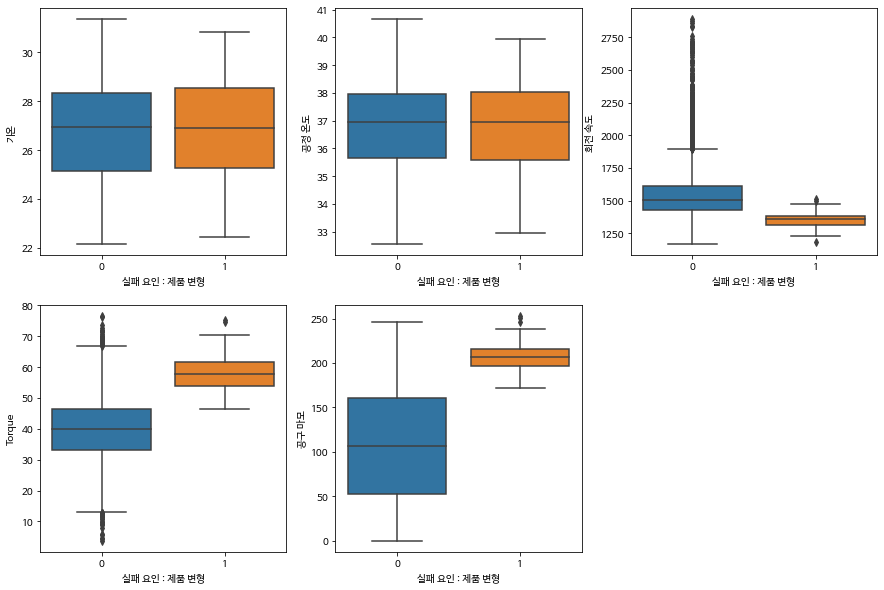

In [ ]:
# 각 변수들과 '실패 요인 : 제품 변형'와의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='실패 요인 : 제품 변형', y='기온', data=df, ax=ax1)
sns.boxplot(x='실패 요인 : 제품 변형', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='실패 요인 : 제품 변형', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='실패 요인 : 제품 변형', y='Torque', data=df, ax=ax4)
sns.boxplot(x='실패 요인 : 제품 변형', y='공구 마모', data=df, ax=ax5)

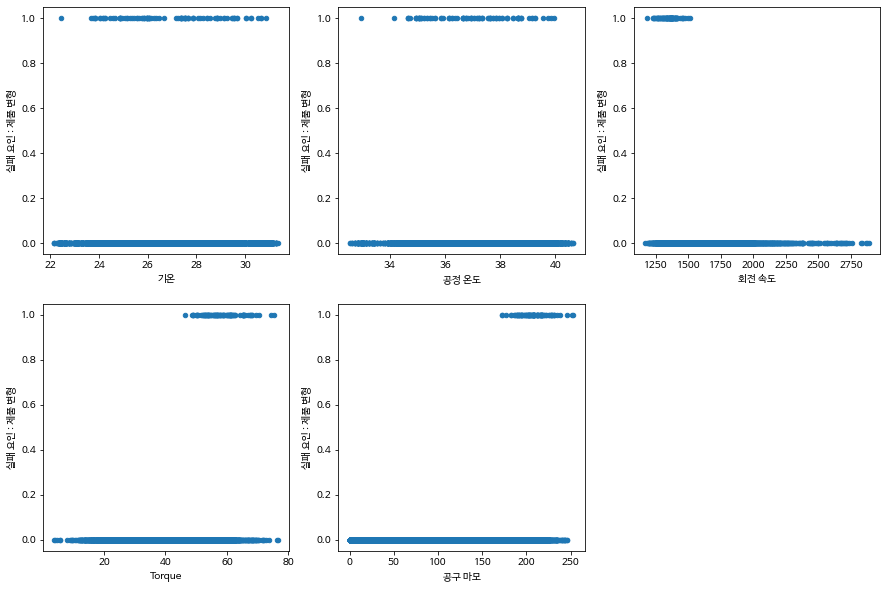

In [9]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='실패 요인 : 제품 변형', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='실패 요인 : 제품 변형', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='실패 요인 : 제품 변형', kind='scatter', ax=ax3)
df.plot(x='Torque', y='실패 요인 : 제품 변형', kind='scatter', ax=ax4)
df.plot(x='공구 마모', y='실패 요인 : 제품 변형', kind='scatter', ax=ax5)

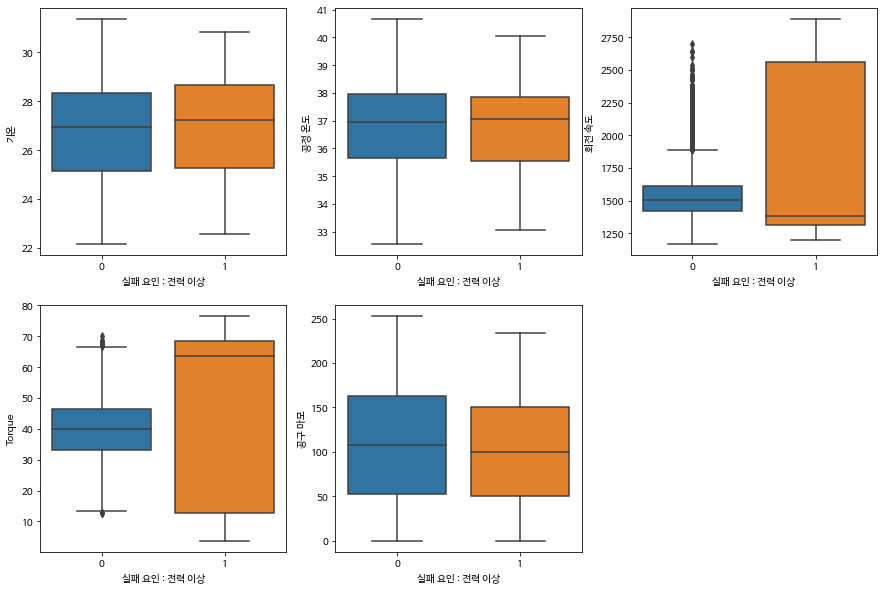

In [ ]:
# 각 변수들과 '실패 요인 : 전력 이상'과의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='실패 요인 : 전력 이상', y='기온', data=df, ax=ax1)
sns.boxplot(x='실패 요인 : 전력 이상', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='실패 요인 : 전력 이상', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='실패 요인 : 전력 이상', y='Torque', data=df, ax=ax4)
sns.boxplot(x='실패 요인 : 전력 이상', y='공구 마모', data=df, ax=ax5)

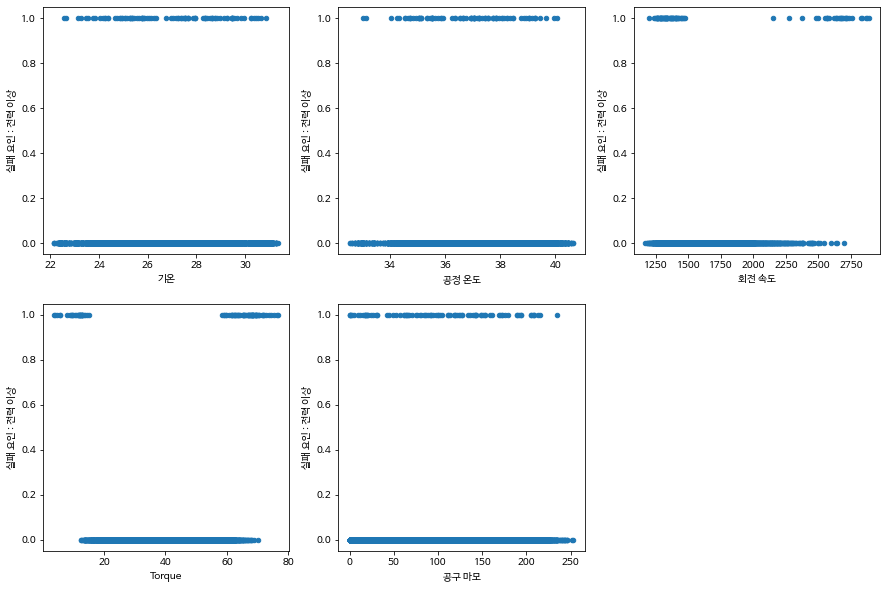

In [10]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='실패 요인 : 전력 이상', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='실패 요인 : 전력 이상', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='실패 요인 : 전력 이상', kind='scatter', ax=ax3)
df.plot(x='Torque', y='실패 요인 : 전력 이상', kind='scatter', ax=ax4)
df.plot(x='공구 마모', y='실패 요인 : 전력 이상', kind='scatter', ax=ax5)

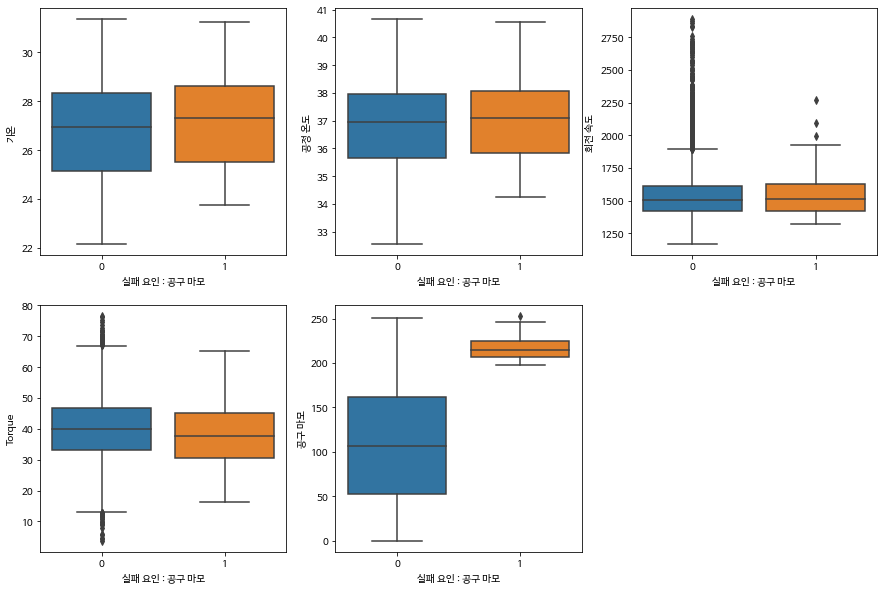

In [ ]:
# 각 변수들과 '실패 요인 : 공구 마모'와의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='실패 요인 : 공구 마모', y='기온', data=df, ax=ax1)
sns.boxplot(x='실패 요인 : 공구 마모', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='실패 요인 : 공구 마모', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='실패 요인 : 공구 마모', y='Torque', data=df, ax=ax4)
sns.boxplot(x='실패 요인 : 공구 마모', y='공구 마모', data=df, ax=ax5)

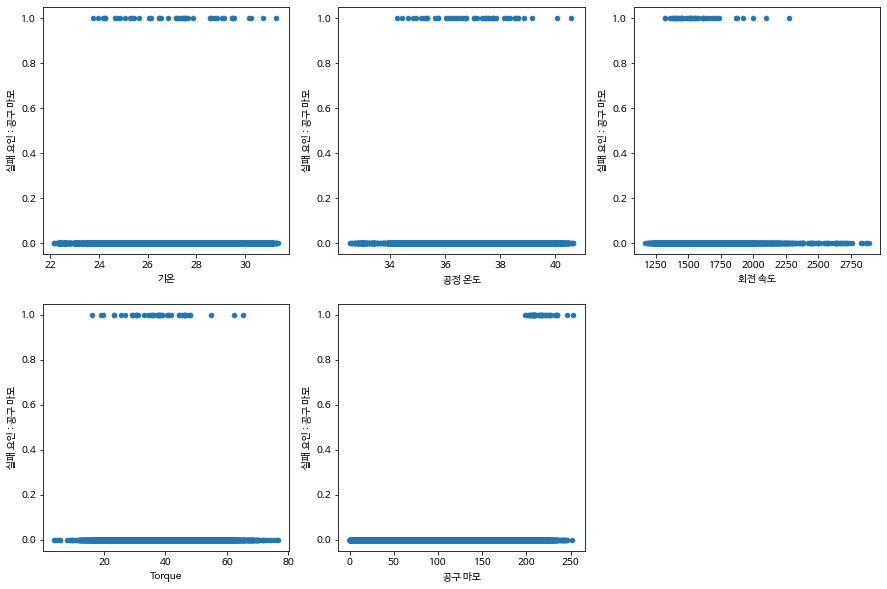

In [11]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='실패 요인 : 공구 마모', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='실패 요인 : 공구 마모', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='실패 요인 : 공구 마모', kind='scatter', ax=ax3)
df.plot(x='Torque', y='실패 요인 : 공구 마모', kind='scatter', ax=ax4)
df.plot(x='공구 마모', y='실패 요인 : 공구 마모', kind='scatter', ax=ax5)

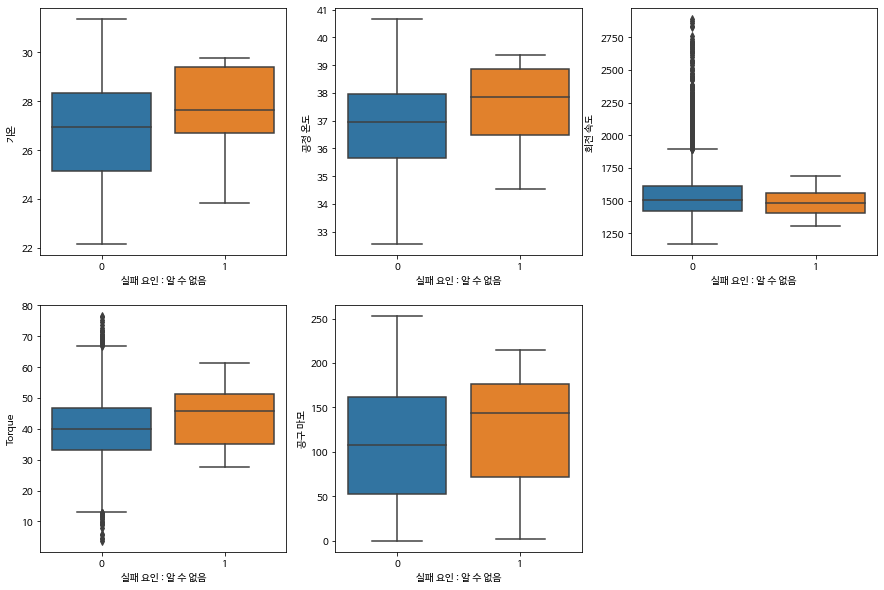

In [ ]:
# 각 변수들과 '실패 요인 : 알 수 없음'와의 상관관계 비교
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.boxplot(x='실패 요인 : 알 수 없음', y='기온', data=df, ax=ax1)
sns.boxplot(x='실패 요인 : 알 수 없음', y='공정 온도', data=df, ax=ax2)
sns.boxplot(x='실패 요인 : 알 수 없음', y='회전 속도', data=df, ax=ax3)
sns.boxplot(x='실패 요인 : 알 수 없음', y='Torque', data=df, ax=ax4)
sns.boxplot(x='실패 요인 : 알 수 없음', y='공구 마모', data=df, ax=ax5)

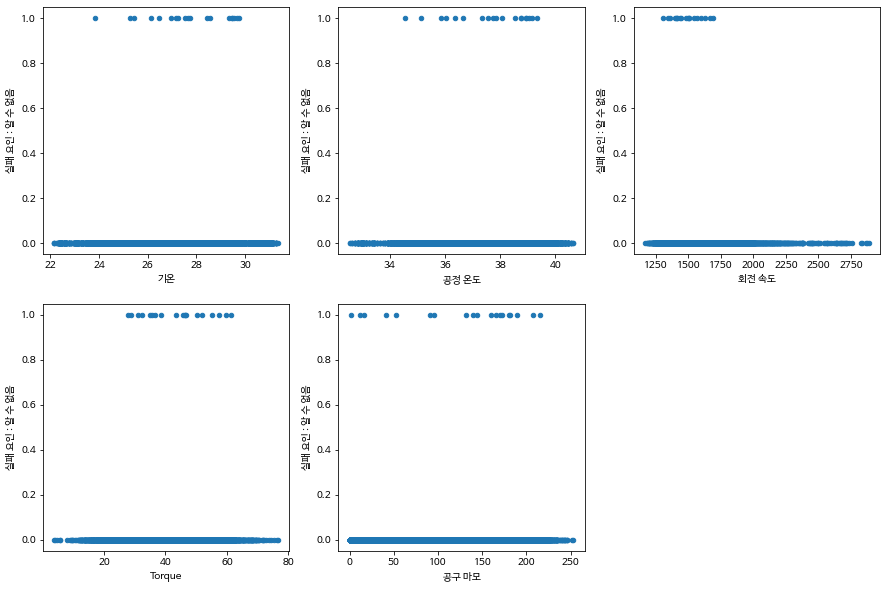

In [12]:
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

df.plot(x='기온', y='실패 요인 : 알 수 없음', kind='scatter', ax=ax1)
df.plot(x='공정 온도', y='실패 요인 : 알 수 없음', kind='scatter', ax=ax2)
df.plot(x='회전 속도', y='실패 요인 : 알 수 없음', kind='scatter', ax=ax3)
df.plot(x='Torque', y='실패 요인 : 알 수 없음', kind='scatter', ax=ax4)
df.plot(x='공구 마모', y='실패 요인 : 알 수 없음', kind='scatter', ax=ax5)

# 결론

In [ ]:
# 해석

# 1. 제품 유형 별로 볼 때, H와 M은 상대적으로 실패 비율이 낮고, L은 실패 비율이 높다.

# 2. 각 변수들은 전체 실패 여부보다는 각 실패 요인과 연관성을 나타낸다.
# 2-1. 열 방산에 의한 실패의 경우, 공구 마모를 제외한 다른 변수들과 모두 연관성이 나타난다.
# 2-2. 제품 변형에 의한 실패의 경우, 회전 속도, Torque, 공구 마모와 연관성이 나타난다.
# 2-3. 전력 이상에 의한 실패의 경우, 회전 속도, Torque와의 연관성이 나타난다.
# 2-4. 공구 마모에 의한 실패의 경우, 회전 속도, 공구 마모와의 연관성이 나타난다.
# 2-5. 실패 요인을 알 수 없는 경우, 회전 속도와의 경미한 연관성이 나타난다.

# 3. 종합해 봤을 때, 실패율을 줄이기 위해서는
# 기온은 27도를 넘기지 않는 환경에서,
# 회전속도와 Torque는 극단값을 갖지 않는 적절한 수준으로 유지하고,
# 공구 마모를 최대한 줄이는 것이 방안이 될 수 있겠다.